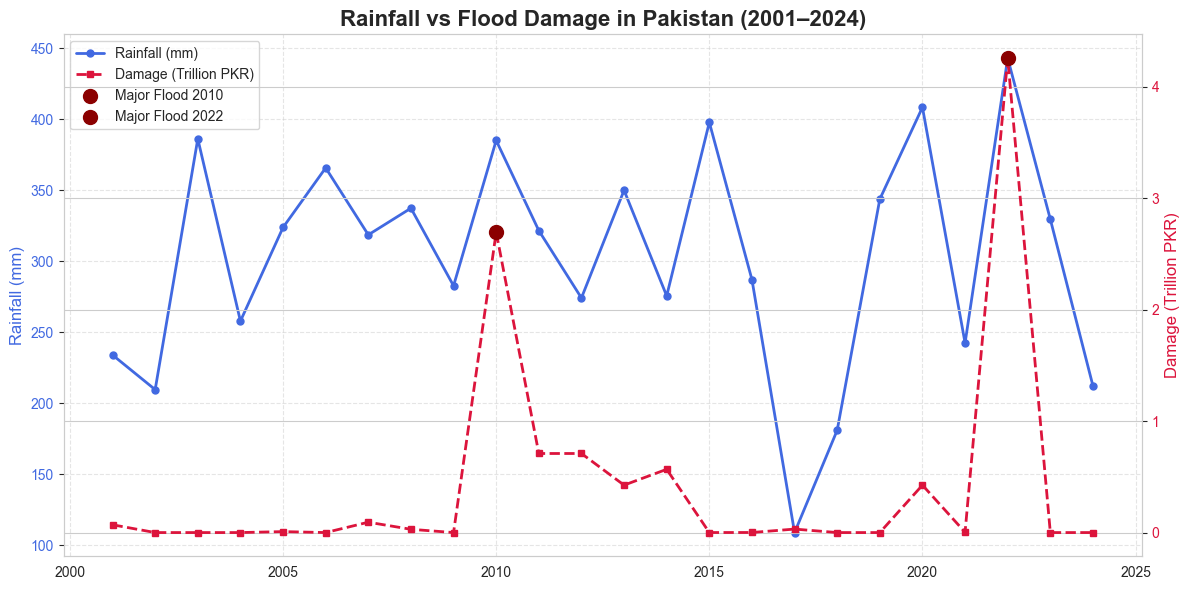

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/merged_data.csv")

# Convert damage values into numeric PKR
def convert_damage(value):
    if isinstance(value, str):
        if "B" in value:
            return float(value.replace("B", "").strip()) * 1e9
        elif "M" in value:
            return float(value.replace("M", "").strip()) * 1e6
        elif value.strip() == "0.00":
            return 0.0
    return float(value)

df["Total_Damage_PKR"] = df["Total_Damage_Amount_PKR"].apply(convert_damage)
df["Total_Damage_Trillion"] = df["Total_Damage_PKR"] / 1e12  # trillions

# Year range for title
year_min, year_max = int(df["Year"].min()), int(df["Year"].max())

# Styling
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12,6))

# Primary axis: Rainfall
ax1.plot(df["Year"], df["Total_Rainfall_mm"], color="royalblue", 
         marker="o", markersize=5, linewidth=2, label="Rainfall (mm)")
ax1.set_ylabel("Rainfall (mm)", color="royalblue", fontsize=12)
ax1.tick_params(axis='y', labelcolor="royalblue")
ax1.grid(True, linestyle="--", alpha=0.5)

# Secondary axis: Damage
ax2 = ax1.twinx()
ax2.plot(df["Year"], df["Total_Damage_Trillion"], color="crimson", 
         marker="s", markersize=5, linewidth=2, linestyle="--", 
         label="Damage (Trillion PKR)")
ax2.set_ylabel("Damage (Trillion PKR)", color="crimson", fontsize=12)
ax2.tick_params(axis='y', labelcolor="crimson")

# Highlight extreme flood years (2010 & 2022)
highlight_years = [2010, 2022]
for year in highlight_years:
    d = df[df["Year"] == year]
    ax2.scatter(d["Year"], d["Total_Damage_Trillion"], 
                color="darkred", s=100, zorder=5, label=f"Major Flood {year}")

# Title
plt.title(f"Rainfall vs Flood Damage in Pakistan ({year_min}–{year_max})", 
          fontsize=16, fontweight="bold")

# Custom combined legend (avoiding duplicates)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc="upper left", frameon=True, fontsize=10)

plt.tight_layout()
plt.savefig("static/plots/rainfall_trend.png")
plt.show()



<Figure size 640x480 with 0 Axes>

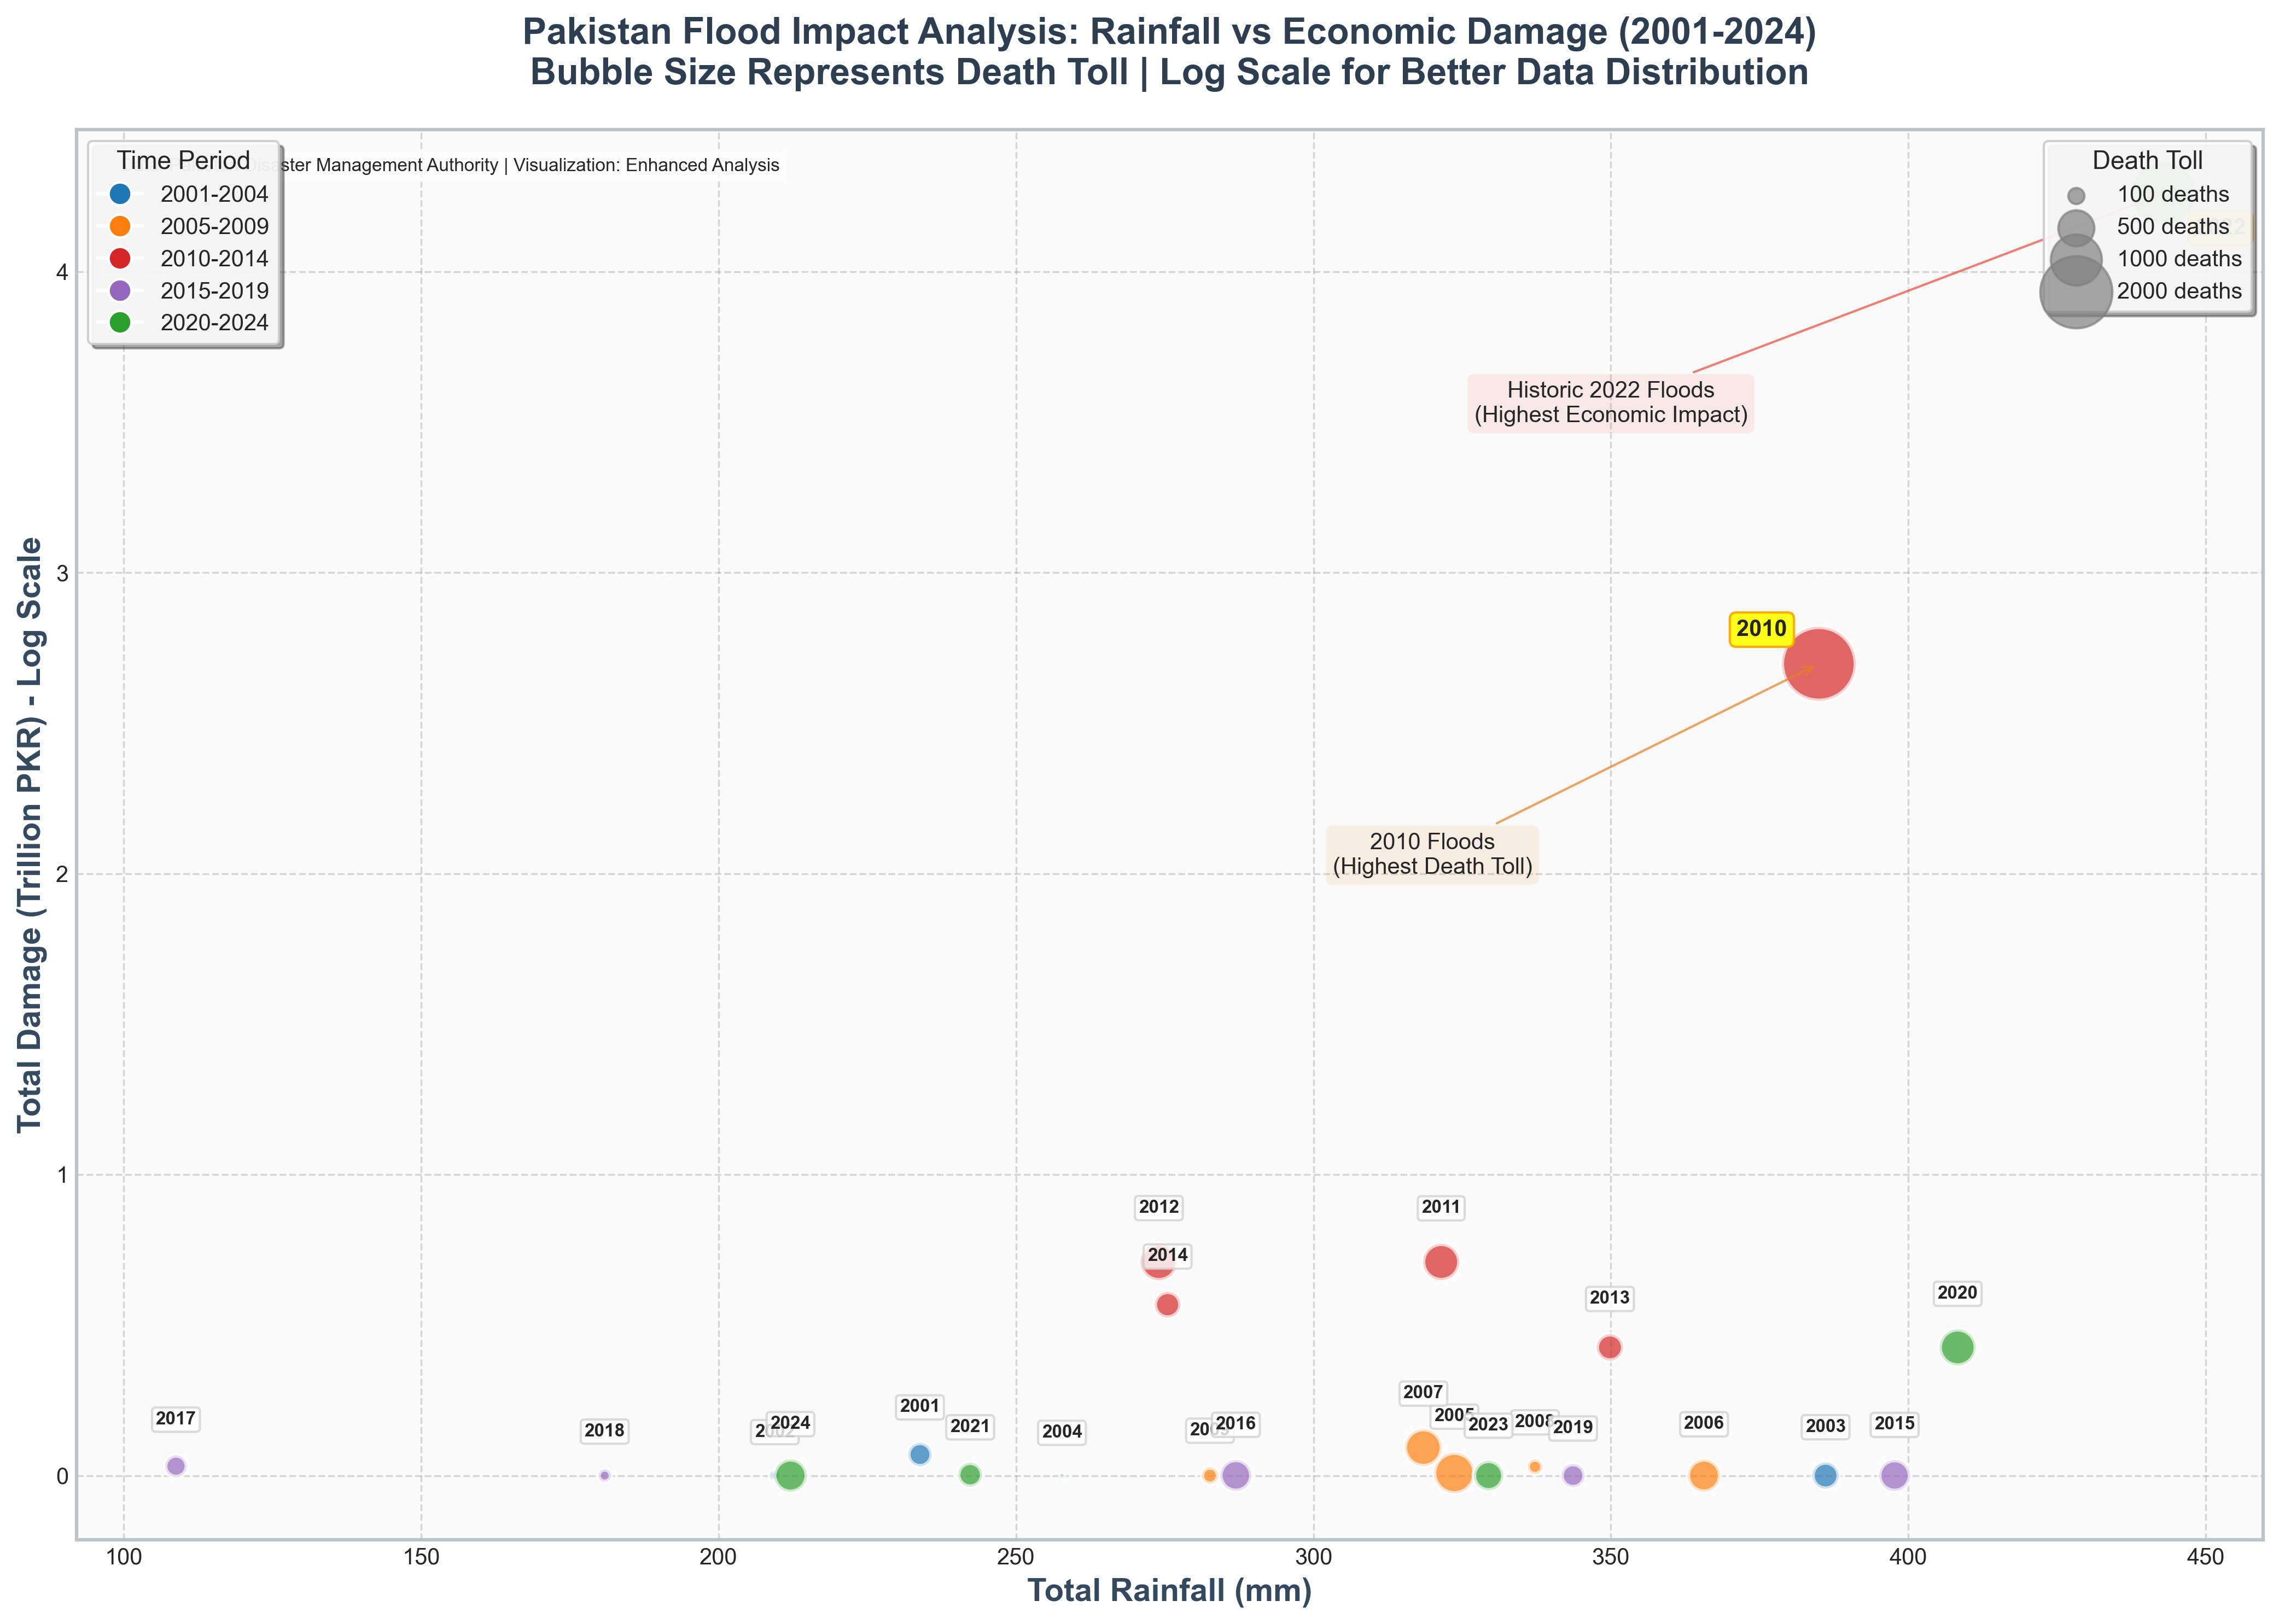

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle

# Set the style for a more professional look
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create the figure with high DPI for better quality
fig, ax = plt.subplots(figsize=(14, 10), dpi=300)

# Define color mapping based on decades for better visualization
def get_decade_color(year):
    if year < 2005:
        return '#1f77b4'  # Blue for early 2000s
    elif year < 2010:
        return '#ff7f0e'  # Orange for mid 2000s
    elif year < 2015:
        return '#d62728'  # Red for early 2010s
    elif year < 2020:
        return '#9467bd'  # Purple for mid 2010s
    else:
        return '#2ca02c'  # Green for 2020s

# Create color list based on years
colors = [get_decade_color(year) for year in df['Year']]

# Create the bubble scatter plot with enhanced styling
scatter = ax.scatter(
    df["Total_Rainfall_mm"],
    df["Total_Damage_Trillion"],
    s=df["Total Deaths"] * 0.5,  # Adjusted size multiplier for better proportion
    c=colors,
    alpha=0.7,
    edgecolors='white',
    linewidth=2,
    zorder=3
)

# Add year labels with improved positioning and styling
for i in range(len(df)):
    # Calculate dynamic offset based on bubble size and position
    base_offset = 15
    size_offset = (df["Total Deaths"].iloc[i] / df["Total Deaths"].max()) * 20
    total_offset = base_offset + size_offset
    
    # Special positioning for high-damage years to avoid annotation overlap
    if df["Year"].iloc[i] in [2022, 2010]:
        # Position these labels differently to avoid annotation conflicts
        if df["Year"].iloc[i] == 2022:
            x_offset, y_offset = 25, -15
        else:  # 2010
            x_offset, y_offset = -25, 15
        
        ax.annotate(
            str(int(df["Year"].iloc[i])),
            (df["Total_Rainfall_mm"].iloc[i], df["Total_Damage_Trillion"].iloc[i]),
            xytext=(x_offset, y_offset),
            textcoords='offset points',
            fontsize=10,
            fontweight='bold',
            ha='center',
            va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.9, edgecolor='orange'),
            zorder=5
        )
    else:
        ax.annotate(
            str(int(df["Year"].iloc[i])),
            (df["Total_Rainfall_mm"].iloc[i], df["Total_Damage_Trillion"].iloc[i]),
            xytext=(0, total_offset),
            textcoords='offset points',
            fontsize=8,
            fontweight='bold',
            ha='center',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor='lightgray'),
            zorder=4
        )

# Enhance title and labels (update for log scale)
ax.set_title(
    'Pakistan Flood Impact Analysis: Rainfall vs Economic Damage (2001-2024)\nBubble Size Represents Death Toll | Log Scale for Better Data Distribution',
    fontsize=16,
    fontweight='bold',
    pad=20,
    color='#2c3e50'
)

ax.set_xlabel('Total Rainfall (mm)', fontsize=14, fontweight='bold', color='#34495e')
ax.set_ylabel('Total Damage (Trillion PKR) - Log Scale', fontsize=14, fontweight='bold', color='#34495e')

# Improve grid
ax.grid(True, linestyle='--', alpha=0.3, color='gray', zorder=1)
ax.set_axisbelow(True)

# Set background color
ax.set_facecolor('#fafafa')

# Create custom legend for decades
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f77b4', markersize=10, label='2001-2004'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff7f0e', markersize=10, label='2005-2009'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#d62728', markersize=10, label='2010-2014'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#9467bd', markersize=10, label='2015-2019'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#2ca02c', markersize=10, label='2020-2024')
]

# Add decade legend
legend1 = ax.legend(handles=legend_elements, title='Time Period', 
                   loc='upper left', fontsize=10, title_fontsize=11,
                   frameon=True, fancybox=True, shadow=True)
legend1.get_frame().set_facecolor('white')
legend1.get_frame().set_alpha(0.9)

# Create size legend for deaths
size_legend_elements = [
    plt.scatter([], [], s=50, c='gray', alpha=0.7, label='100 deaths'),
    plt.scatter([], [], s=250, c='gray', alpha=0.7, label='500 deaths'),
    plt.scatter([], [], s=500, c='gray', alpha=0.7, label='1000 deaths'),
    plt.scatter([], [], s=1000, c='gray', alpha=0.7, label='2000 deaths')
]

legend2 = ax.legend(handles=size_legend_elements, title='Death Toll', 
                   loc='upper right', fontsize=10, title_fontsize=11,
                   frameon=True, fancybox=True, shadow=True)
legend2.get_frame().set_facecolor('white')
legend2.get_frame().set_alpha(0.9)

# Add first legend back
ax.add_artist(legend1)

# Improve axis limits with padding
x_margin = (df["Total_Rainfall_mm"].max() - df["Total_Rainfall_mm"].min()) * 0.05
y_margin = (df["Total_Damage_Trillion"].max() - df["Total_Damage_Trillion"].min()) * 0.05

ax.set_xlim(df["Total_Rainfall_mm"].min() - x_margin, df["Total_Rainfall_mm"].max() + x_margin)
ax.set_ylim(-y_margin, df["Total_Damage_Trillion"].max() + y_margin)

# Add subtle border
for spine in ax.spines.values():
    spine.set_edgecolor('#bdc3c7')
    spine.set_linewidth(1.5)

# Add data source annotation
ax.text(0.02, 0.98, 'Data: Pakistan Disaster Management Authority | Visualization: Enhanced Analysis', 
        transform=ax.transAxes, fontsize=8, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Highlight extreme events with subtle annotations
# 2022 - Highest damage
ax.annotate('Historic 2022 Floods\n(Highest Economic Impact)', 
           xy=(df[df['Year'] == 2022]['Total_Rainfall_mm'].iloc[0], 
               df[df['Year'] == 2022]['Total_Damage_Trillion'].iloc[0]),
           xytext=(350, 3.5),
           fontsize=10,
           ha='center',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='#e74c3c', alpha=0.1),
           arrowprops=dict(arrowstyle='->', color='#e74c3c', alpha=0.7))

# 2010 - High deaths
ax.annotate('2010 Floods\n(Highest Death Toll)', 
           xy=(df[df['Year'] == 2010]['Total_Rainfall_mm'].iloc[0], 
               df[df['Year'] == 2010]['Total_Damage_Trillion'].iloc[0]),
           xytext=(320, 2.0),
           fontsize=10,
           ha='center',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='#e67e22', alpha=0.1),
           arrowprops=dict(arrowstyle='->', color='#e67e22', alpha=0.7))

plt.tight_layout()
plt.savefig("static/plots/bubble scatter.png")
plt.show()

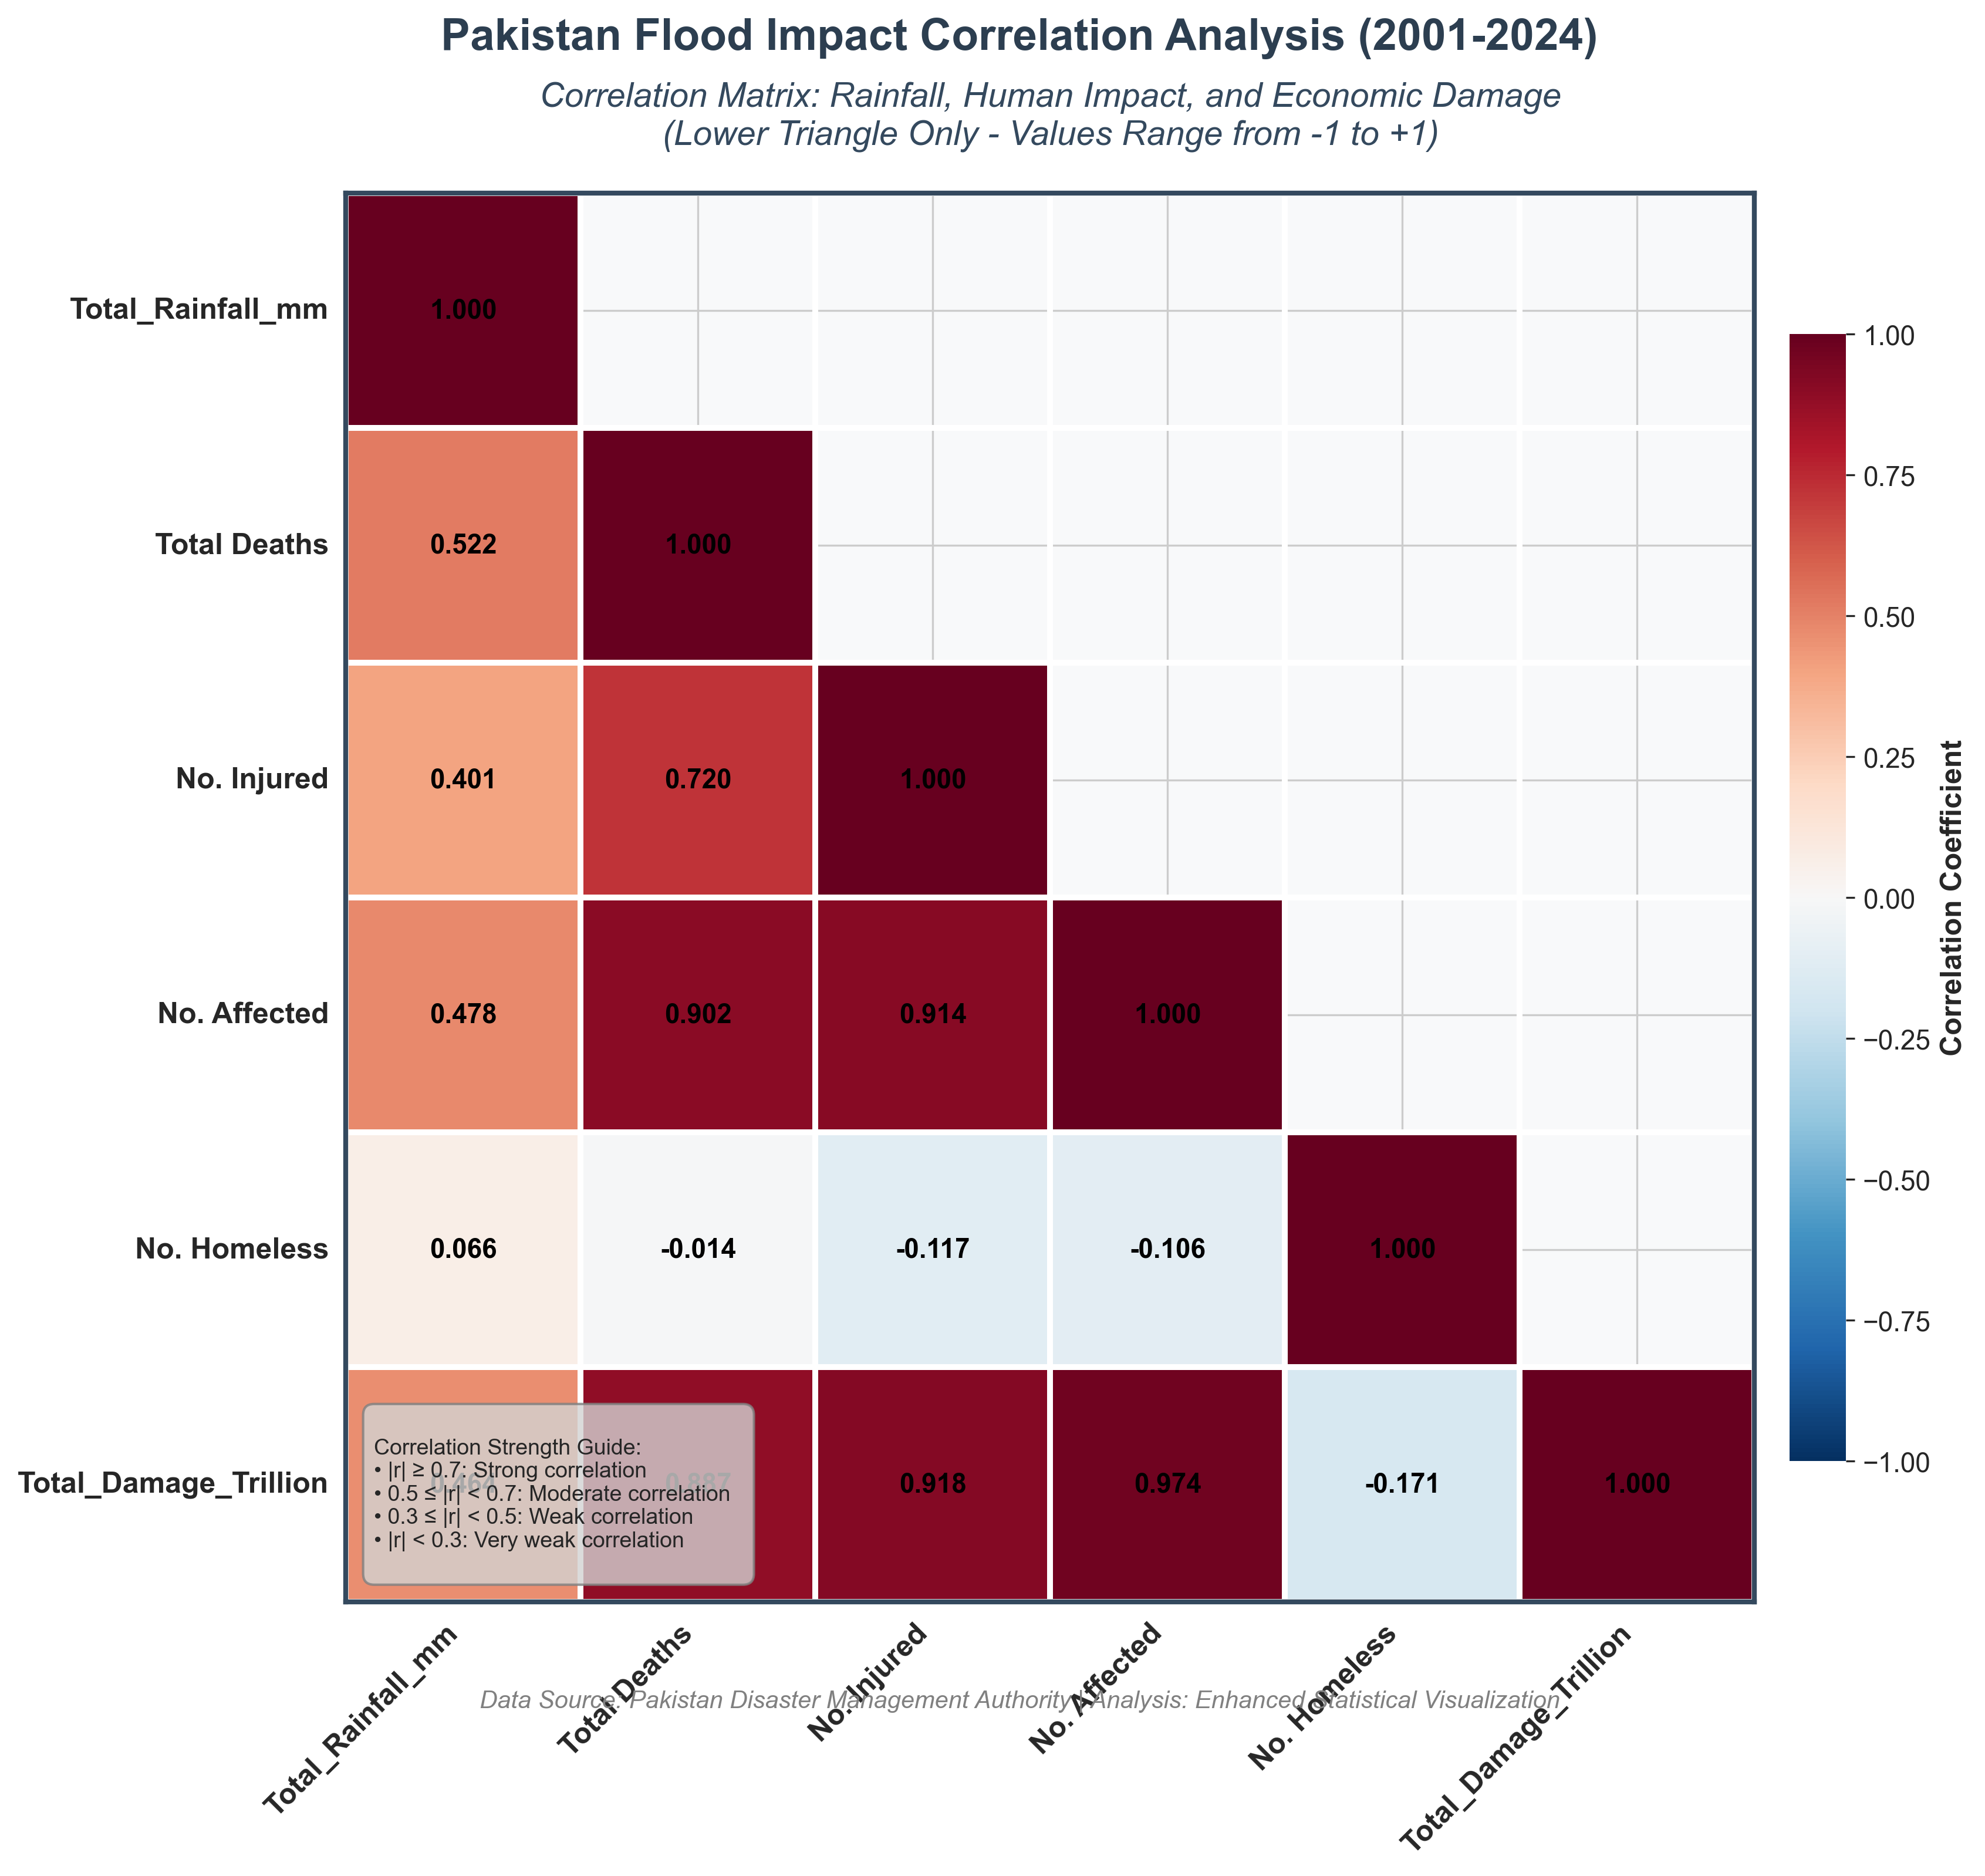

In [6]:
from matplotlib.colors import LinearSegmentedColormap
# Set style for professional appearance
plt.style.use('default')
sns.set_style("whitegrid")

# Create figure with high quality
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)

# Select all numeric columns for correlation analysis
numeric_columns = [
    'Total_Rainfall_mm', 
    'Total Deaths', 
    'No. Injured', 
    'No. Affected', 
    'No. Homeless', 
    'Total_Damage_Trillion'
]

# Create correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a custom diverging colormap for better visual appeal
colors = ['#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffbf', 
          '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2']
n_bins = 256
cmap = LinearSegmentedColormap.from_list('custom_coolwarm', colors, N=n_bins)

# Create the heatmap with enhanced styling
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # Mask upper triangle

heatmap = sns.heatmap(
    correlation_matrix,
    mask=mask,  # Show only lower triangle to avoid redundancy
    annot=True,
    fmt='.3f',
    cmap='RdBu_r',  # Professional diverging colormap
    center=0,
    square=True,
    cbar_kws={
        'shrink': 0.8,
        'label': 'Correlation Coefficient',
        'orientation': 'vertical',
        'pad': 0.02
    },
    annot_kws={
        'size': 11,
        'weight': 'bold',
        'color': 'black'
    },
    linewidths=2,
    linecolor='white',
    vmin=-1,
    vmax=1,
    ax=ax
)

# Customize the heatmap appearance
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=12,
    fontweight='bold'
)

heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    rotation=0,
    fontsize=12,
    fontweight='bold'
)

# Enhanced title and subtitle
fig.suptitle(
    'Pakistan Flood Impact Correlation Analysis (2001-2024)',
    fontsize=18,
    fontweight='bold',
    y=0.98,
    color='#2c3e50'
)

ax.set_title(
    'Correlation Matrix: Rainfall, Human Impact, and Economic Damage\n(Lower Triangle Only - Values Range from -1 to +1)',
    fontsize=14,
    pad=20,
    color='#34495e',
    style='italic'
)

# Customize colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
cbar.set_label('Correlation Coefficient', fontsize=12, fontweight='bold')

# Add interpretation guide
interpretation_text = """
Correlation Strength Guide:
• |r| ≥ 0.7: Strong correlation
• 0.5 ≤ |r| < 0.7: Moderate correlation  
• 0.3 ≤ |r| < 0.5: Weak correlation
• |r| < 0.3: Very weak correlation
"""

ax.text(
    0.02, 0.02,
    interpretation_text,
    transform=ax.transAxes,
    fontsize=9,
    verticalalignment='bottom',
    bbox=dict(
        boxstyle='round,pad=0.5',
        facecolor='lightgray',
        alpha=0.8,
        edgecolor='gray'
    )
)

# Remove the insights text box - will be provided separately

# Add border around the plot
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)
    spine.set_edgecolor('#34495e')

# Add subtle background
ax.set_facecolor('#f8f9fa')

# Add data source
fig.text(
    0.5, 0.02,
    'Data Source: Pakistan Disaster Management Authority | Analysis: Enhanced Statistical Visualization',
    ha='center',
    fontsize=10,
    style='italic',
    color='gray'
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.08, top=0.88)
plt.savefig("static/plots/heatmap.png")
plt.show()
